# Solution for a Radial Advection Test

Following Kannan et al. 2018.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial Values for analytic solution

In [2]:
# Section 3.1 of Kannan et al 2018
# Initial values of params

A0 = 40.
r0 = 1.2
sigma = 0.1
c = 1.

## Functions

### Radius with time

In [3]:
# define a simple function that gives radius with time
def r_t(t):
    return c*t + r0

### 1D radial position in x,y with order of indices

In [4]:
# define a function that takes xy positions, creates a 2D array, 1D array, along with array of indices for sorting

def r_arr(x,y):
    r_2D = np.array((x**2 + y**2)**0.5) 
    rarr = r_2D.flatten()                  
    r_ind = rarr.argsort()             
    return r_2D, rarr, r_ind

### Defining time step

Not needed for analytic solution

In [ ]:
# Delta t for grid solver
# Need to fix this 

def del_t(c_reduced, C0, del_x, del_y):
    return C0*min(del_x / c_reduced, del_y / c_reduced)

### Unit vector for the direction of radiation propagation 

Not needed for analytic solution

In [ ]:
# define the direction of radiation
# All positions must be centered on zero
# Be careful about where the origin - for now should be ok
# Input takes a 1D or 2D x and y array(s)

def n_dir(xx,yy):
    theta_arr = np.arctan2(yy,xx)     # Calculates angle based on xy position, keeps track of quadrant
    
    cos_2D = np.cos(theta_arr)        # Plug theta array into cosine

    sin_2D = np.sin(theta_arr)        # Plug theta array into sine

    return np.array([cos_2D, sin_2D]) # r-direction - for initial dir

### Expected pulse amplitude with time.

In [ ]:
# define a function that provides the expected amplitude
# as a function of time

def Er_Amplitude(t):
    return A0*r0/r_t(t)

### Photon number density as a function of position and time

Used for initial calculation and analytic solution

In [5]:
# define a function to return the expected photon number density

def Er_xyt(x,y,t):
    A_t = Er_Amplitude(t)  #amplitude of gaussian pulse
    rt = r_t(t)            #current radius of gaussian pulse
    r = (x**2 + y**2)**0.5 #radial position in x,y
    return A_t*np.exp(-0.5*((r-rt)/sigma)**2)

### Photon flux with position and time

Used for initial calculation

In [ ]:
# Calculated photon flux
# Used as a check and to calculate initial value
# F_r is defined by r-vector: E_r*n-hat, n-hat = r-hat for this case
# Will need to re-write this for anything beyond 1D
# put in C-dependance

def Fr_xyt(xx,yy,Er_xyt):
    n_vec = n_dir(xx,yy)    # Initial direction of radiation - r-hat

    return Er_xyt*n_vec     

### Pressure tensor by computing the Eddington tensor for grid solver

In [ ]:
# Define the pressure tensor
# Based on equations (9) and (10)

# Not working - need to continue looking into matrix cross product

def P_tensor(c_red, E_xyt, F_xyt):
    # Er and Fr are going to have to be updated from previous values   
    
    Fxyt_norm = np.linalg.norm(F_xyt, ord='fro') # Find the norm of Fr, for 1D test this is just Er
                                               #'fro' = frobenius norm
    f = Fxyt_norm / (c_red * E_xyt)              # F_r / |F_r|-- normalized F_r
    
    chi = (3. + (4.*(f**2))) / (5. + 2.*np.sqrt(4. - 3.*(f**2))) # Eqn 10
    
    n = F_xyt / Fxyt_norm                          # Eqn 10
    
    chi_n_term = (((3. * chi) - 1.) / 2.) * n  # Preparing for cross product (eqn 9)
    
    cross_prod = np.cross(chi_n_term, n)       # This does vector and matrix cross products

    D_tensor = ((1. - chi) / 2.) * np.identity(2) +  cross_prod
    
    return E_xyt * D_tensor

#taking the divergence of this gives us dFr/dt
#And then discretize them, remainder of 3.1

### Divergence of a Tensor

In [ ]:
# Calculates the divergence of a tensor
# Used to update F_r
# Sum of the directional derivatives of the tensor's components

#def div_tensor() 

### Photon flux for grid solver

In [ ]:
# Calculated solution for Fr
# Kappa_f = radiation flux
# May need to write my own code for the divergence of a tensor

def F_r(c_red, kappa_f, rho, p_tensor):
    return - (c_red / (kappa_f * rho)) #* divergence of P_tensor 

### Photon number density for grid solver

In [ ]:
# Calculated solution for Er
# This is going to change based on the problem (?)

def E_r(temp):
    # a_rad is the radiation constant
    # The default has units (J / (m**3 K**4))
    # temp must be given in K
    a_rad = 7.565767e-16
    return a_rad * temp**4 

# Analytic Solution for Radial Advection Test

### Make a panel of Figure 1 from Kannan et al 2018

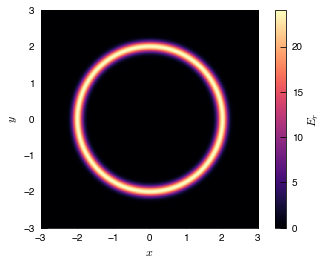

In [6]:
N = 512
x = np.linspace(-3,3,N)
y = np.linspace(-3,3,N)
xx, yy = np.meshgrid(x,y)

t = 0.8

Er = Er_xyt(xx,yy,t)

plt.imshow(Er,cmap="magma",extent=[-3,3,-3,3])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
cbar = plt.colorbar()
cbar.set_label(r'$E_r$')

### Make a panel of Figure 2 from Kannan et al 2018

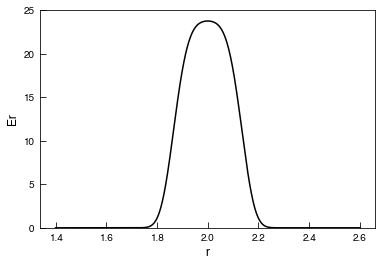

In [7]:
r_2D, r_1D, r_ind = r_arr(xx,yy)

Er_arr = np.array(Er).flatten()                 # Compress Er into a 1D array as well

fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)
ax.plot(r_1D[r_ind], Er_arr[r_ind], color='k')  # Including indices orders the values correctly
ax.set_xlim(left=1.4, right=2.6)
ax.set_ylim(bottom=0)
ax.set_xlabel('r')
ax.set_ylabel('Er')
plt.show()

# Numeric solution for a Radial Advection Test - 2D grid

## Initial Values for grid solution

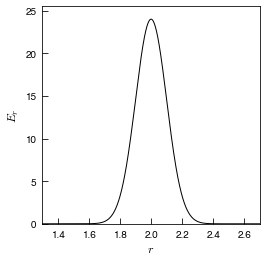

In [17]:
r_arr = (xx**2 + yy**2)**0.5
r_arr_flat = r_arr.flatten()
xi = r_arr_flat.argsort()
Er_flat = Er.flatten()
plt.plot(r_arr_flat[xi],Er_flat[xi],color="0",linewidth=1)
plt.xlim([1.3,2.7])
plt.ylim([0,25.5])
plt.gca().set_aspect((2.7-1.3)/25.5)
plt.xlabel(r'$r$')
plt.ylabel(r'$E_r$')
plt.savefig('rad_advection_test.png',dpi=500)

In [ ]:
N = 512                   # Grid resolution
x = np.linspace(-3,3,N)
y = np.linspace(-3,3,N)
xx, yy = np.meshgrid(x,y)

t_0 = 0.
t_f = 0.8
C_0 = 1.                  # Need to write an equation to actually calculate CFL number
c_red = 1.                # "" reduced sound speed, aka max wave speed in a cell
del_x = abs(x[0] - x[1]) 

#Need to define initial values of fluxes and U
E0 = Er_xyt(xx,yy,t_0)
F0 = Fr_xyt(xx,yy,E0)
# U0 is the initial vector of conserved quantities 
# F_U0 is the initial flux vector 
U0 = np.array([E0, F0])
# Need to figure out if Pressure tensor uses a cross product or tensor product
#F_U0 = np.array([F0, ])